In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import imdb,fashion_mnist
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
(traindata,trainlabel),(testdata,testlabel) = imdb.load_data(num_words = 10000)

In [8]:
import numpy as np

def vectorizer(seq , dim = 10000):
    result = np.zeros((len(seq),dim))
    for i,sequ in enumerate(seq):
        result[i,sequ] = 1
    return result
    

In [9]:
xtrain = vectorizer(traindata)
xtest = vectorizer(testdata)

In [10]:
xtrain

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [17]:
ytrain = np.asarray(trainlabel).astype('float32')
ytest = np.asarray(testlabel).astype('float32')

In [19]:
model = Sequential()
model.add(Dense(16, input_shape = (10000,), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam",loss = "mse", metrics = ["mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(xtrain,ytrain,epochs = 20)

Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0565 - mae: 0.1125
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0422 - mae: 0.0842
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0327 - mae: 0.0652
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 0.0257 - mae: 0.0503
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0206 - mae: 0.0401
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 0.0178 - mae: 0.0323
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0158 - mae: 0.0281
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0142 - mae: 0.0247
Epoch 9/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0124 - mae: 0.0213
Epoch 10/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0117 - mae: 0.0200
Epoch 11/20
782/782 [============================

In [26]:
import pandas as pd
history = pd.DataFrame(history.history)

In [27]:
history

,loss,mae
0,0.056455,0.112538
1,0.042179,0.084248
2,0.032715,0.065246
3,0.025678,0.050350
4,0.020633,0.040130
5,0.017762,0.032297
6,0.015766,0.028140
7,0.014189,0.024697
8,0.012377,0.021317
9,0.011749,0.020026


In [28]:
h = model.predict(xtest)

782/782 [==============================] - 2s 2ms/step


In [29]:
import matplotlib.pyplot as plt

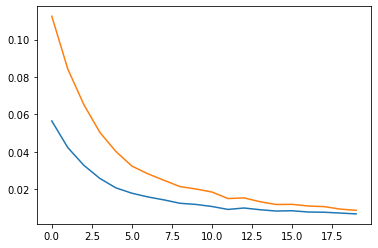

In [31]:
plt.plot(history)